## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [62]:
import pandas as pd
import scipy.stats

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
df = pd.read_csv('data/human_body_temperature.csv')

In [65]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81
2,97.8,M,73
3,99.2,F,66
4,98.0,F,73


In [66]:
df.shape

(130, 3)

In [67]:
print df[df.gender=='F'].temperature.mean(), df[df.gender=='F'].temperature.std()
print df[df.gender=='M'].temperature.mean(), df[df.gender=='M'].temperature.std()
print df.temperature.mean(), df.temperature.std()

98.3938461538 0.743487752731
98.1046153846 0.698755762327
98.2492307692 0.733183158039


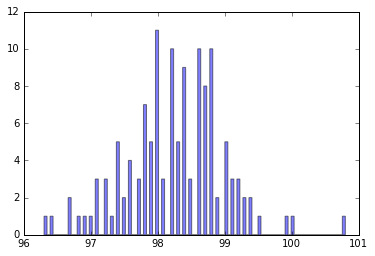

In [68]:
fig, ax = plt.subplots()
H=ax.hist(df.temperature, bins=100, alpha=0.5, histtype='stepfilled')


## Question 1
Is the distribution of body temperatures normal?
Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.

Answer: Yes, the distribution of body temperatures is mostly Normal/Gaussian

## Question 2
Is the true population mean really 98.6 degrees F?

Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?

Answer: Z test would be appropriate here since the sample size is > 30

H_0: Population mean is 98.6

H_1: Population mean is not 98.6

In [69]:
sample_mean = df.temperature.mean()
sample_std = df.temperature.std()
print sample_mean, sample_std

98.2492307692 0.733183158039


In [70]:
# Sampling distribution of mean variance/ std:
spl_std = sample_std/(130**0.5)
# NUmber of standard deviations the proposed mean is away from sample mean (Z score):
z_score=(sample_mean-98.6)/spl_std
z_score

-5.454823292364079

In [71]:
p_value=scipy.stats.norm.cdf(z_score)

P value is very small so the Hypothesis that population mean is 98.6 can be rejected. 
The True population mean cannot be 98.6

## Question 3
At what temperature should we consider someone's temperature to be "abnormal"?

Start by computing the margin of error and confidence interval.

In [72]:
scipy.stats.norm.interval(0.99, loc=sample_mean, scale=spl_std)

(98.083593567992111, 98.414867970469444)

The normal temperature range I define is within 99% CI of the sample mean. Abnormal temperature is below 98.08 and above 98.4

In [73]:
# z_score for 99% CI:
z_scr = 2.58
margin_of_error = z_scr*spl_std
print'Margin of error:', margin_of_error

Margin of error: 0.165905395442


## Question 4
 Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

In [74]:
mu_f = df[df.gender=='F'].temperature.mean()
std_f = df[df.gender=='F'].temperature.std()
n_f = df[df.gender=='F'].temperature.count()
mu_m = df[df.gender=='M'].temperature.mean()
std_m = df[df.gender=='M'].temperature.std()
n_m = df[df.gender=='M'].temperature.count()

H_0: There is no difference in normal temp between males and females (mu_del = 0)

H_1: There is significant delta in normal temp between males and females (mu_del > 0)

In [78]:
mu_del = mu_f - mu_m
std_del = ((std_f**2/n_f) + (std_m**2/n_m))**0.5

print mu_del, std_del

0.289230769231 0.12655395042


In [79]:
# Hypothesis test with significance level of 5%
# Assuming that the null hypothesis is true, what is the probability that mu_del is likely
z_score = mu_del/std_del
print z_score

2.28543453817


In [80]:
scipy.stats.norm.ppf(1-0.025)

1.959963984540054

Since the z score is beyond the 5% significance level, we can reject the null hypothesis, In other words there is a differnece between male and female temperatures